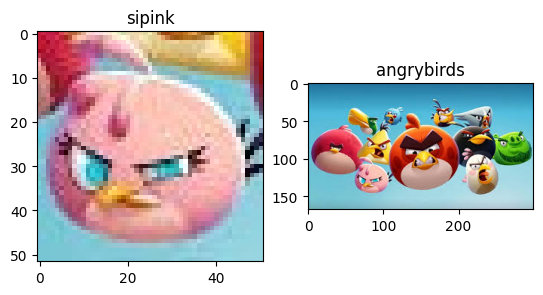

In [2]:
# tampilkan kedua gambar
from matplotlib import pyplot as plt
import cv2
# panggil dan konversi warna agar sesuai dengan Matplotlib
sipink = cv2.imread('sipink.jpg')
sipink =  cv2.cvtColor(sipink, cv2.COLOR_BGR2RGB)

# panggil dan konversi warna agar sesuai dengan Matplotlib
angry_birds = cv2.imread('angrybirds.jpg')
angry_birds =  cv2.cvtColor(angry_birds, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(sipink), plt.title('sipink')
plt.subplot(122),plt.imshow(angry_birds), plt.title('angrybirds')
plt.show()


Jumlah objek ditemukan  10


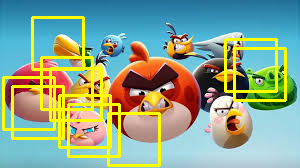

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

## membaca gambar utuh untuk dicari
img_rgb = cv2.imread('angrybirds.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

## membaca template
template = cv2.imread('sipink.jpg',0)

## ukuran template. ukuran ini akan digunakan untuk menggambar kotak
w, h = template.shape[::-1]

# menggunakan metode COEFF-NORMALIZED
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)

# Nilai threshold atau ambang batas deteksi kemiripan titik.
# Lakukan eksperimen dengan merubah nilai ini
threshold = 0.15
loc = np.where(res >= threshold)

## membuat array kosong untuk menyimpan lokasi-lokasi dari hasil deteksi
lspoint=[]
lspoint2=[]
count = 0  # untuk menyimpan jumlah matching yang ditemukan
for pt in zip(*loc[::-1]):
	## jika sudah ada, skip lokasi tersebut
	if pt[0] not in lspoint and pt[1] not in lspoint2:
		## gambar persegi warna kuning dengan ketebalan dua poin
		cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)
		for i in range(((pt[0])-9), ((pt[0])+9),1):
			## tambahkan koordinat x ke list
			lspoint.append(i)
		for k in range(((pt[1])-9), ((pt[1])+9),1):
			## tambahkan koordinat y ke list
			lspoint2.append(k)
		count+=1 ### berapa jumlah matching yang ditemukan?
	else:
		continue
print ("Jumlah objek ditemukan ", count)

## tampilkan dengan imshow
cv2_imshow(img_rgb)